[View in Colaboratory](https://colab.research.google.com/github/aliawadh980/test-repository/blob/master/MobileNet_test.ipynb)

Taken from:
https://github.com/JunshengFu/ResNet_MobileNet_InceptionV3

In [87]:
#!pip install -q keras
#import keras
print(keras.__version__)

2.1.6


In [0]:
import tensorflow as tf
import keras
import numpy as np
from keras.preprocessing import image

#-----ResNet50--------#
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

#-----Mobilenet-------#
from keras.applications.mobilenet import MobileNet, preprocess_input, decode_predictions

#-----InceptionV3-----#
from keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions

#-----Mobilenet2-------#
#from keras.applications.mobilenetv2 import MobileNetV2
#from keras.applications.mobilenet_v2 import MobileNetv2, preprocess_input, decode_predictions


In [0]:
# model = keras.applications.mobilenet.MobileNet()
# model = keras.applications.mobilenetv2.MobileNetV2(input_shape=None, alpha=1.0, depth_multiplier=1, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)

model_MobileNet   = MobileNet(weights='imagenet')
# model_MobileNet2  = keras.applications.mobilenetv2.MobileNetV2()
model_ResNet50    = ResNet50 (weights='imagenet')
model_InceptionV3 = InceptionV3(weights='imagenet')


In [0]:
from PIL import Image
import requests
from io import BytesIO

url = "https://images.pexels.com/photos/533990/pexels-photo-533990.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" # Arabian_camel
url = "https://images.pexels.com/photos/305223/pexels-photo-305223.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" # black car from side
#url = "https://images.pexels.com/photos/807900/pexels-photo-807900.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" # child
#url = "https://images.pexels.com/photos/8509/family.jpg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260"# family in open car from top
#url = "https://images.pexels.com/photos/207653/pexels-photo-207653.jpeg?auto=compress&cs=tinysrgb&dpr=2&h=350" # child
url = "https://raw.githubusercontent.com/JunshengFu/ResNet_MobileNet_InceptionV3/master/light1.jpg" # original traffic light

response = requests.get(url)
img = Image.open(BytesIO(response.content))
# with target size!
img = image.load_img(BytesIO(response.content), target_size=(224, 224))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

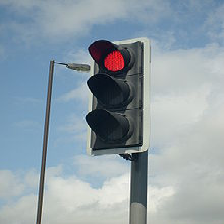

In [90]:
img

In [0]:
# decode the results into a list of tuples (class, description, probability)
preds_MobileNet   = model_MobileNet.predict(x)
preds_RestNet50   = model_ResNet50.predict(x)
preds_InceptionV3 = model_InceptionV3.predict(x)


In [92]:
# print the top 3 guesses
print('Predicted MobileNet  :', decode_predictions(preds_MobileNet, top=3)[0])
print('Predicted ResNet50   :', decode_predictions(preds_RestNet50, top=3)[0])
print('Predicted InceptionV3:', decode_predictions(preds_InceptionV3, top=3)[0])

Predicted MobileNet  : [('n06874185', 'traffic_light', 0.9999782), ('n06794110', 'street_sign', 4.433651e-06), ('n03691459', 'loudspeaker', 3.1087895e-06)]
Predicted ResNet50   : [('n01930112', 'nematode', 0.09481874), ('n03207941', 'dishwasher', 0.04311435), ('n03041632', 'cleaver', 0.023681853)]
Predicted InceptionV3: [('n06874185', 'traffic_light', 1.0), ('n03710721', 'maillot', 8.7837526e-10), ('n02231487', 'walking_stick', 5.6996396e-10)]
